In [17]:
z = {'a':'aa','b':'bbb','c':''}

import time

In [19]:
def define_fill(dictionary):
    full_size = len(dictionary.keys())
    fill_fields = sum([1*(len(z[key])>0) for key in dictionary.keys()])
    percentage_filled = round(fill_fields/full_size,2)
    return(percentage_filled)


In [20]:
define_fill(z)

0.67

In [32]:
for i in range(133):
    z[i] = str(i)*(i%2)

In [33]:
define_fill(z)

0.5

In [35]:
len(None)

TypeError: object of type 'NoneType' has no len()

In [38]:
for k, v in my_dict.items():
    if v is None:
        my_dict[k] = "my default value"


In [37]:
my_dict = {'a':None}

In [39]:
my_dict

{'a': 'my default value'}

In [111]:
import numpy as np
import matplotlib.pyplot as plt



In [112]:
nsite = 2
ordem = nsite*2
ngridy = 2**5
t = 1
SO = 0.1/(3*np.sqrt(3))
E = 0.1



In [113]:
l1 = [-1,0,-1]
l2 = [0,1,0]
m1 = np.diag(l1, k=-1)
m2 = np.diag(l2, k=-1)

In [114]:
M1 = np.diag([-1,1,-1,1], k=0)
M2 = np.diag([1,-1], k=2)
M5 = np.diag([1,-1,1,-1])*E

In [115]:
M1a = np.diag([1,-1,1,-1], k=0)
M2a = np.diag([-1,1], k=2)
M2a = M2a - M2a.T
print(M2a)

[[ 0  0 -1  0]
 [ 0  0  0  1]
 [ 1  0  0  0]
 [ 0 -1  0  0]]


In [116]:
m1=m1+m1.T
m2=m2+m2.T
M2=M2+M2.T

In [117]:
M2

array([[ 0,  0,  1,  0],
       [ 0,  0,  0, -1],
       [ 1,  0,  0,  0],
       [ 0, -1,  0,  0]])

<function matplotlib.pyplot.show(close=None, block=None)>

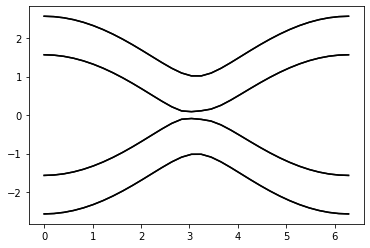

In [118]:
k = np.linspace(-np.pi*0, 2*np.pi, ngridy)
Hamil = np.zeros((ordem, ordem, len(k)), dtype = float)

#Começamos a popular a matriz Hamiltoniana. (Primeiros vizinhos)

for i in range(len(k)):
    Hamil[:,:,i] = m1*(2*np.cos(k[i]/2))
    Hamil[:,:,i] += m2*(-t)
    Hamil[:,:,i] += M5
#Segundos vizinhos

for i in range(len(k)):
    Hamil[:,:,i] += SO*M1*2*(np.sin(k[i]))
    Hamil[:,:,i] += SO*M2*2*(np.sin(k[i]/2))
    
#Agora criando bloco diagonal:
Hamil_B = np.zeros([2*ordem, 2*ordem, len(k)], dtype = float)
m0 = np.zeros([ordem, ordem])

#Fazendo a iteração
for i in range(len(k)):
    Hamil_i = Hamil[:,:,i]
    Hamil_i_c = np.conjugate(Hamil[:,:,i])
    Hamil_bloco = np.block([[Hamil_i, m0],[m0,Hamil_i_c]])#matriz bloco
    Hamil_B[:,:,i] = Hamil_bloco
    
#criando os autovalores

auto_val = []

for i in range(len(k)):
     auto_val.append(np.linalg.eigvalsh(Hamil_B[:,:,i]))

plt.plot(k,np.array(auto_val),"k")
plt.show

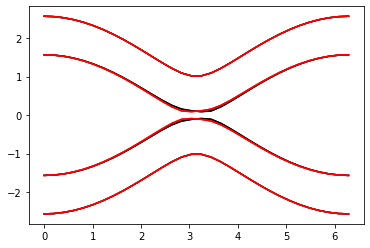

In [119]:
plt.plot(k,np.array(auto_val)[::-1],"k")
plt.plot(k,np.array(auto_val),"r")


<function matplotlib.pyplot.show(close=None, block=None)>

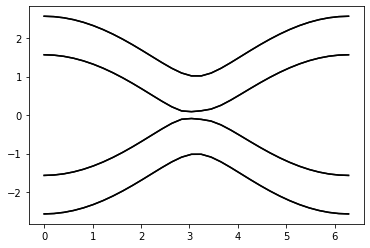

In [79]:
k = np.linspace(-np.pi*0, 2*np.pi, ngridy)
Hamil = np.zeros((ordem, ordem, len(k)), dtype = float)

#Começamos a popular a matriz Hamiltoniana. (Primeiros vizinhos)

for i in range(len(k)):
    Hamil[:,:,i] = m1*(2*np.cos(k[i]/2))
    Hamil[:,:,i] += m2*(-t)
    Hamil[:,:,i] += M5
#Segundos vizinhos

for i in range(len(k)):
    Hamil[:,:,i] += SO*M1*2*(np.sin(k[i]))
    Hamil[:,:,i] += SO*M2*2*(np.sin(k[i]/2))
    
#Agora criando bloco diagonal:
Hamil_B = np.zeros([2*ordem, 2*ordem, len(k)], dtype = float)
m0 = np.zeros([ordem, ordem])

#Fazendo a iteração
for i in range(len(k)):
    Hamil_i = Hamil[:,:,i]
    Hamil_i_c = np.conjugate(Hamil[:,:,i])
    Hamil_bloco = np.block([[Hamil_i, m0],[m0,Hamil_i_c]])#matriz bloco
    Hamil_B[:,:,i] = Hamil_bloco
    
#criando os autovalores

auto_val = []

for i in range(len(k)):
     auto_val.append(np.linalg.eigvalsh(Hamil_B[:,:,i]))

plt.plot(k,np.array(auto_val),"k")
plt.show